In [50]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Load data from csv
df = pd.DataFrame.from_csv("HKQuantityTypeIdentifierDistanceWalkingRunning.csv")

In [107]:
# annotate the bars with values
def get_annotations(plt):
    x_offset = -0.4
    y_offset = 0.1

    for p in plt.patches:
        b = p.get_bbox()
        val = "{:.1f}".format(b.y1 + b.y0)
        plt.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
    plt.set_ylabel('Distance in miles')
    # change legend text
    legend = plt.legend()
    legend.get_texts()[0].set_text('distance')

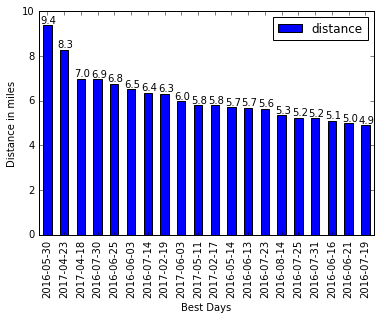

In [108]:
# Best Days

# get date from datetimestamp
df['creationDate'] = pd.to_datetime(df['creationDate']).dt.date

# group the data by date and sort the groupped data by highest value
grouppedByDay = df.groupby(['creationDate']).sum().reset_index().sort_values(['value'], ascending=[0]).head(20)

# print(grouppedByDay.to_string(index=False))

# initialize matplotlib
%matplotlib inline

# plot the bar 
plt = grouppedByDay.plot(kind="bar", x="creationDate", y="value")

plt.set_xlabel('Best Days')

#get annotations for plot
get_annotations(plt)

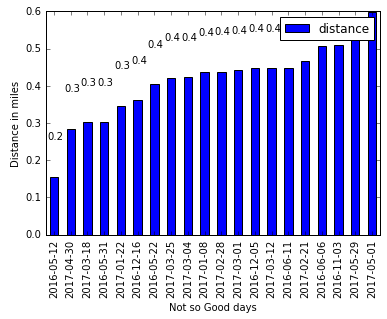

In [110]:
# Not so good days

# get date from datetimestamp
df['creationDate'] = pd.to_datetime(df['creationDate']).dt.date

# group the data by date and sort the groupped data by highest value
grouppedByNotSoGoodDay = df.groupby(['creationDate']).sum().reset_index().sort_values(['value'], ascending=[1]).head(20)

# print(grouppedByDay.to_string(index=False))

# initialize matplotlib
%matplotlib inline

# plot the bar 
plt = grouppedByNotSoGoodDay.plot(kind="bar", x="creationDate", y="value")

plt.set_xlabel('Not so Good days')

#get annotations for plot
get_annotations(plt)

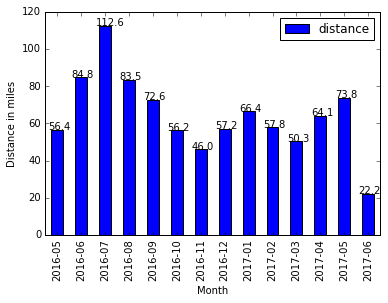

In [112]:
# Month

per = pd.to_datetime(df['creationDate']).dt.to_period("M")

grouppedByMonth = df.groupby(per).sum()

# initialize matplotlib
%matplotlib inline

# plot the bar 
plt = grouppedByMonth.plot(kind="bar")

plt.set_xlabel('Month')

get_annotations(plt)

In [75]:
print(grouppedByMonth.ix[grouppedByMonth['value'].idxmax()])

value    112.557964
Name: 2016-07, dtype: float64


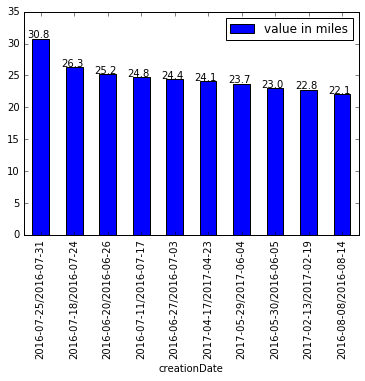

In [87]:
# Best Weeks

# group the values per week
per = pd.to_datetime(df['creationDate']).dt.to_period("W")

grouppedByWeek = df.groupby(per).sum().reset_index().sort_values(['value'], ascending=[0]).head(10)

%matplotlib inline
# plot the bar 
plt = grouppedByWeek.plot(kind="bar", x="creationDate", y="value")

get_annotations(plt)

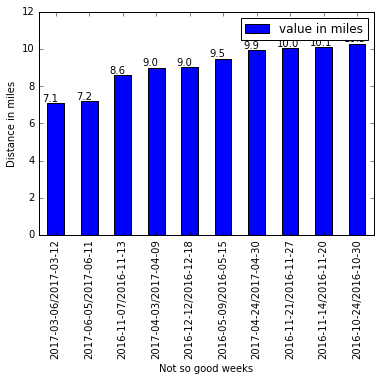

In [96]:
# Not so good weeks

# group the values per week
per = pd.to_datetime(df['creationDate']).dt.to_period("W")

grouppedByNotSoGoodWeek = df.groupby(per).sum().reset_index().sort_values(['value'], ascending=[1]).head(10)

%matplotlib inline
# plot the bar 
plt = grouppedByNotSoGoodWeek.plot(kind="bar", x="creationDate", y="value")

plt.set_xlabel('Not so good weeks')



get_annotations(plt)